In [43]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/adult-census-income-dataset/adult.csv


<h2 style="background-color:#FF00FF;color:white;border-radius: 8px; padding:12px">Loading the Dataset and Libraries</h2>

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("/kaggle/input/adult-census-income-dataset/adult.csv")

data.head()


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


<h2 style="background-color:#FF00FF;color:white;border-radius: 8px; padding:12px">Data Cleaning and Preprocessing</h2>
<h4 style="background-color:#3C10DC;color:white;border-radius: 8px; padding:12px">Replace "?" with NaN and handle missing values appropriately.</h4>


In [45]:
# Function to replace '?' with pd.NA
def replace_question_mark(x):
    return pd.NA if isinstance(x, str) and x.strip() == '?' else x

# Apply the function to each element in the DataFrame
data = data.apply(lambda col: col.map(replace_question_mark))

# Replace infinite values with NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [46]:

# Function to replace '?' with pd.NA
def replace_question_mark(x):
    return pd.NA if isinstance(x, str) and x.strip() == '?' else x

# Apply the function to each element in the DataFrame
data = data.apply(lambda col: col.map(replace_question_mark))

data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,<NA>,77053,HS-grad,9,Widowed,<NA>,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,<NA>,186061,Some-college,10,Widowed,<NA>,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


<h4 style="background-color:#3C10DC;color:white;border-radius: 8px; padding:12px">Check for missing values</h4>

In [47]:
missing_values_after_replacement = data.isna().sum()
print(missing_values_after_replacement[missing_values_after_replacement > 0])


workclass         1836
occupation        1843
native.country     583
dtype: int64


<h2 style="background-color:#FF00FF;color:white;border-radius: 8px; padding:12px">Initial Exploration</h2>

The dataset contains various features such as age, workclass, education, marital status, occupation, relationship, race, sex, capital gain, capital loss, hours per week, native country, and income. The income column is our target variable, indicating whether an individual's income is less than or equal to 50K or greater than 50K.

<h4 style="background-color:#3C10DC;color:white;border-radius: 8px; padding:12px">Summary Statistics</h4>

The summary statistics provide the following insights:

Age: The dataset includes individuals ranging from 17 to 90 years old, with a mean age of approximately 38.6 years.

Education: There are 16 unique education levels, with the most common being "HS-grad."

Marital Status: There are 7 unique categories, with "Married-civ-spouse" being the most frequent.

Occupation: There are 15 unique occupations, with "Prof-specialty" being the most common.

Race: The dataset includes 5 races, with "White" being the most frequent.

Sex: There are 2 unique values, with "Male" being the most common.

Capital Gain and Loss: These features have significant variability, with high standard deviations.

Hours Per Week: Individuals work between 1 and 99 hours per week, with a mean of approximately 40.4 hours.

Native Country: There are 42 unique countries, with "United-States" being the most common.

<h2 style="background-color:#FF00FF;color:white;border-radius: 8px; padding:12px">Data Visualization</h2>

<h3 style="background-color:#1098DC;color:white;border-radius: 8px; padding:12px">Distribution of Age</h3>

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


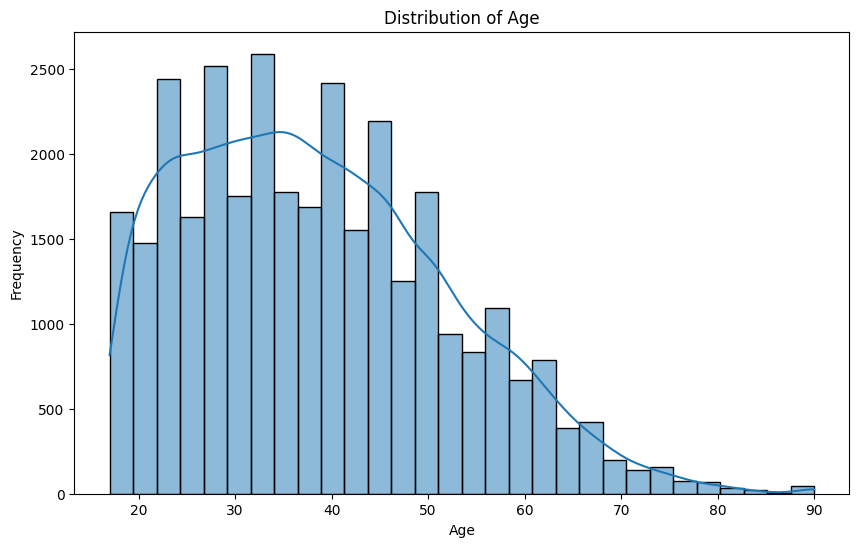

In [48]:
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


<h3 style="background-color:#1098DC;color:white;border-radius: 8px; padding:12px">Income Distribution</h3>

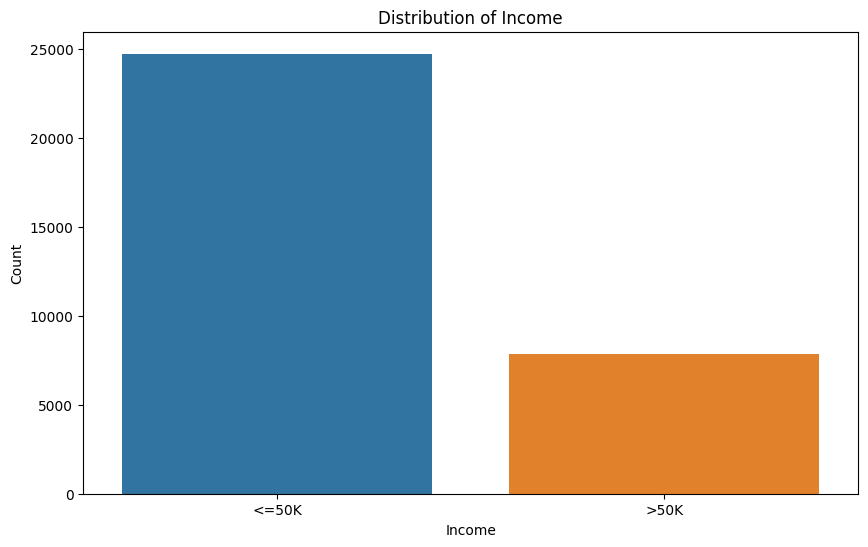

In [49]:
plt.figure(figsize=(10, 6))
sns.countplot(x='income', data=data)
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

<h3 style="background-color:#1098DC;color:white;border-radius: 8px; padding:12px">Hours Per Week by Income</h3>

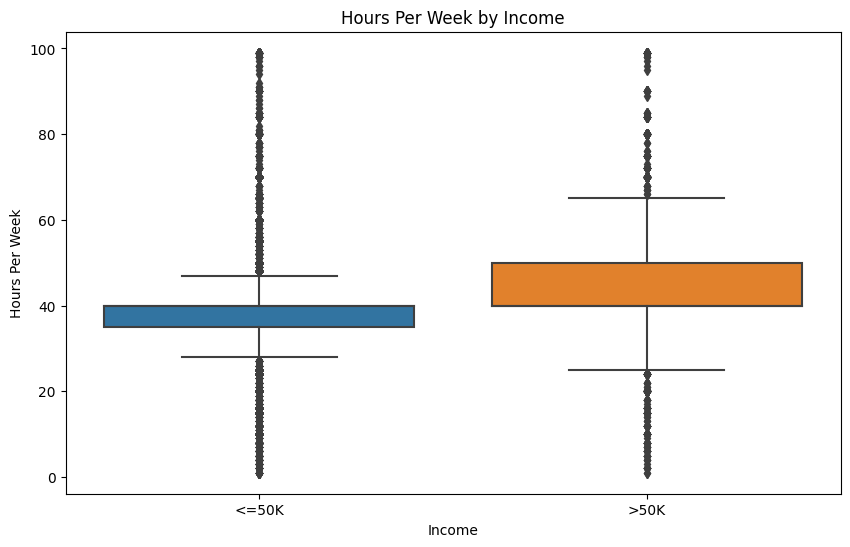

In [50]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='hours.per.week', data=data)
plt.title('Hours Per Week by Income')
plt.xlabel('Income')
plt.ylabel('Hours Per Week')
plt.show()

<h3 style="background-color:#1098DC;color:white;border-radius: 8px; padding:12px">Education Level by Income</h3>

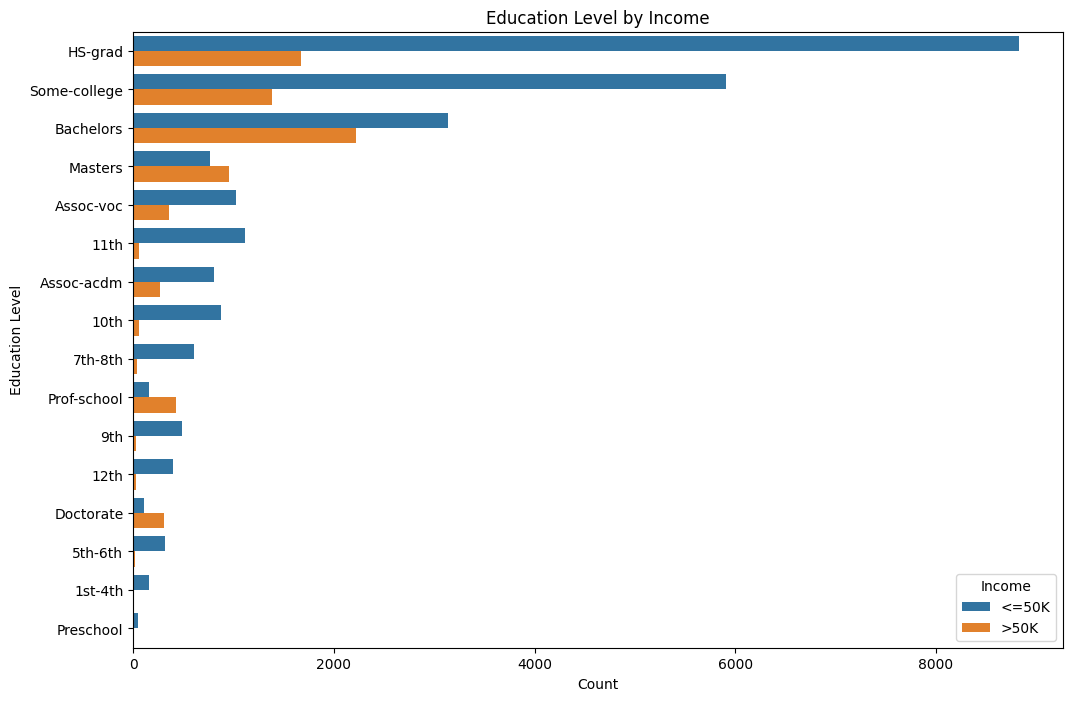

In [51]:
plt.figure(figsize=(12, 8))
sns.countplot(y='education', hue='income', data=data, order=data['education'].value_counts().index)
plt.title('Education Level by Income')
plt.xlabel('Count')
plt.ylabel('Education Level')
plt.legend(title='Income')
plt.show()

<h3 style="background-color:#1098DC;color:white;border-radius: 8px; padding:12px">Capital Gain Distribution</h3>

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


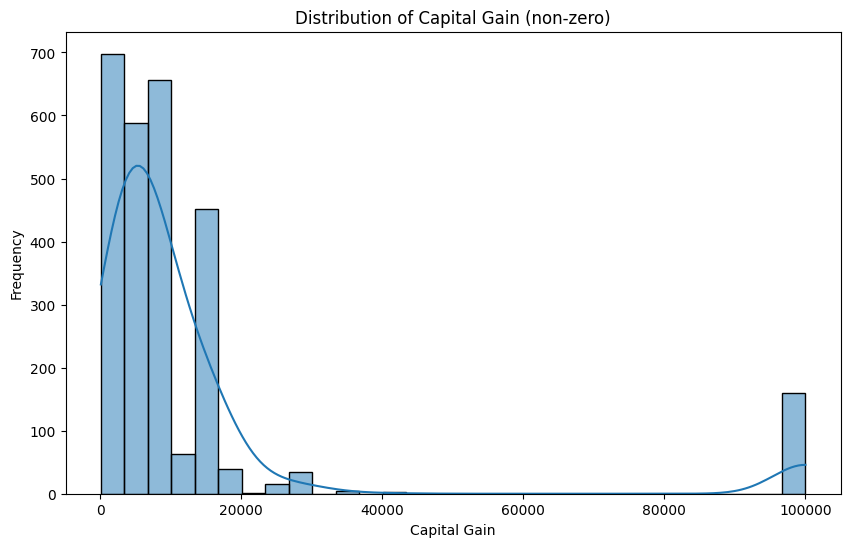

In [52]:
plt.figure(figsize=(10, 6))
sns.histplot(data[data['capital.gain'] > 0]['capital.gain'], bins=30, kde=True)
plt.title('Distribution of Capital Gain (non-zero)')
plt.xlabel('Capital Gain')
plt.ylabel('Frequency')
plt.show()

<h3 style="background-color:#1098DC;color:white;border-radius: 8px; padding:12px">Correlation Heatmap</h3>

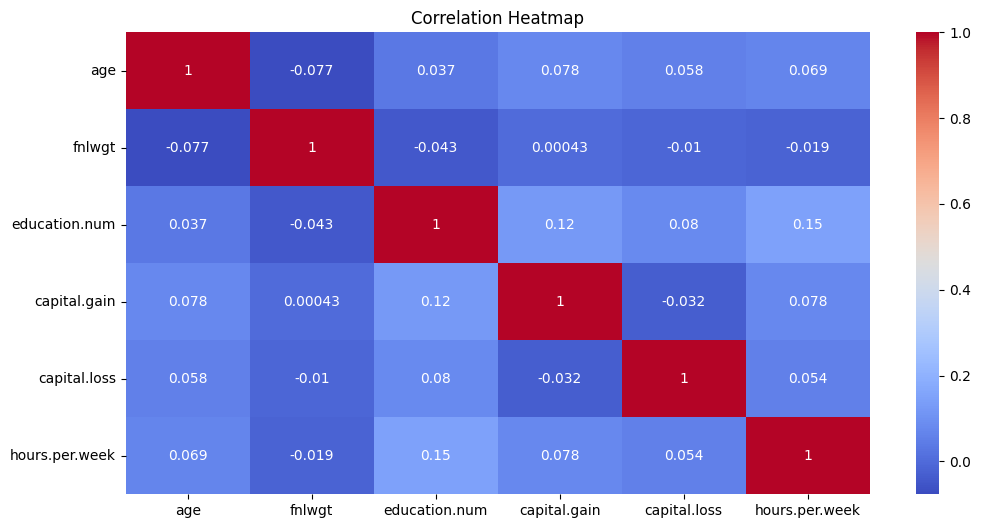

In [53]:
# Drop non-numeric columns
data = data.select_dtypes(include=['number'])

# Correlation heatmap for numeric variables
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()